In [3]:
import pandas as pd
import numpy as np

train = pd.read_csv('training_data_small.csv')

In [4]:
data_numeric = train.select_dtypes(include='number')
data_notnumeric =  train.select_dtypes(include='object')
#data_complete = train.dropna()

In [5]:
print('Categorical features are')
print(data_notnumeric.columns)

Categorical features are
Index(['GENDER', 'DRIVER_MARTIAL_STATUS', 'DRIVER_TRAINING_IND'], dtype='object')


In [6]:
#Discovering the number of distinct values in caegorical columns
#data_notnumeric.apply(pd.Series.nunique)
state_counts = data_notnumeric.apply(lambda x: len(x.unique()))
state_counts.sort_values(ascending=False)

DRIVER_TRAINING_IND      3
DRIVER_MARTIAL_STATUS    3
GENDER                   3
dtype: int64

In [7]:
#Using a dictionary to list the different values of each columns
d = {}
for x in data_notnumeric.columns:
    d[x] = data_notnumeric[x].unique()

print(d)

{'GENDER': array(['F', 'M', nan], dtype=object), 'DRIVER_MARTIAL_STATUS': array(['S', 'M', nan], dtype=object), 'DRIVER_TRAINING_IND': array(['N', nan, 'Y'], dtype=object)}


In [8]:
y1 = train['INCURRED_LOSS_COLLISION']
y2 = train['INCURRED_LOSS_DCPD']
y3 = train['INCURRED_LOSS_COMPREHENSIVE']
X = train.drop(['INCURRED_LOSS_COLLISION', 'INCURRED_LOSS_DCPD','INCURRED_LOSS_COMPREHENSIVE'], axis=1).select_dtypes(exclude=['object'])


In [9]:
X_numeric = X.select_dtypes(include='number')

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_absolute_error

In [11]:
my_imputer = Imputer()
Imp_X_numeric = pd.DataFrame(my_imputer.fit_transform(X_numeric))

In [35]:

train_X, test_X, train_y1, test_y1 = train_test_split(Imp_X_numeric, y1, test_size=0.25)

In [13]:
def get_mae(max_leaf_nodes, train_X, test_X, train_y1, test_y1):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y1)
    preds_val = model.predict(test_X)
    mae = mean_absolute_error(test_y1, preds_val)
    return(mae)

In [14]:
import pylab
import numpy

x = numpy.arange(100, 1000, 10)
y = []
for i in x:
    y += [get_mae(i,train_X,test_X,train_y1,test_y1)]

# compose plot
pylab.plot(x,y) 
pylab.show() # show the plot

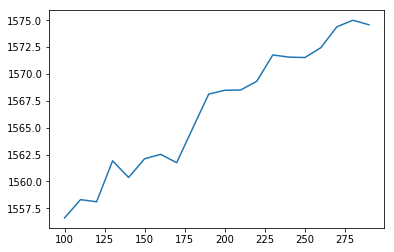

In [15]:
x = numpy.arange(100, 300, 10)
y = []
for i in x:
    y += [get_mae(i,train_X,test_X,train_y1,test_y1)]

# compose plot
pylab.plot(x,y) 
#pylab.show() # show the plot

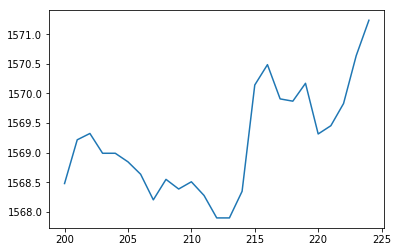

In [16]:
x = numpy.arange(200, 225, 1)
y = []
for i in x:
    y += [get_mae(i,train_X,test_X,train_y1,test_y1)]

# compose plot
pylab.plot(x,y) 
pylab.show() # show the plot

In [17]:
#seems that best is at 208
get_mae(208,train_X,test_X,train_y1,test_y1)

1568.5478478164914

In [18]:
y1.mean() #This means the mae is verrrrryyy bad

822.44893000000002

In [19]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y1)
forest_preds = forest_model.predict(test_X)
print(mean_absolute_error(test_y1, forest_preds))

1786.274012


In [20]:
train.columns

Index(['LATITUDE', 'LONGITUDE', 'AGE', 'YEARS_WITH_COMPANY',
       'ANNUAL_KILOMETERS', 'DAILY_KILOMETERS', 'YEARS_LICENSED',
       'VEHICLE_YEAR', 'NUMBER_OF_DRIVERS', 'NUMBER_OF_VEHICLES',
       'PRIOR_COMPANY', 'DEDUCTIBLE_COLLISION', 'DEDUCTIBLE_COMPREHENSIVE',
       'DEDUCTIBLE_DCPD', 'PAYMENT_METHOD', 'AT_FAULT_CLAIMS',
       'NOT_AT_FAULT_CLAIMS', 'MINOR_CONVICTIONS', 'MAJOR_CONVICTIONS',
       'SERIOUS_CONVICTIONS', 'DRIVING_EXPERIENCE', 'YEARS_WITH_PRIOR_COMPANY',
       'INCURRED_LOSS_COLLISION', 'INCURRED_LOSS_COMPREHENSIVE',
       'INCURRED_LOSS_DCPD', 'GENDER', 'DRIVER_MARTIAL_STATUS',
       'DRIVER_TRAINING_IND', 'VEHICLE_AGE', 'YEARS_SINCE_AT_FAULT_CLAIM',
       'YEARS_SINCE_NOT_AT_FAULT_CLAIM', 'YEARS_SINCE_MINOR_CONVICTION',
       'YEARS_SINCE_MAJOR_CONVICTION', 'YEARS_SINCE_SERIOUS_CONVICTION'],
      dtype='object')

In [21]:
np.cov(y1, y2)

array([[ 13379507.77042956,    -70306.18438555],
       [   -70306.18438555,  14847383.22182232]])

In [22]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
# calculate Pearson's correlation
corr, _ = pearsonr(y1, y2)
print('Pearsons correlation: %.3f' % corr)
corr1, _ = spearmanr(y1, y2)
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: -0.005
Spearmans correlation: -0.005


In [23]:
corr, _ = pearsonr(y1, y3)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.006


In [24]:
Imp_X_numeric.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,45.628860,-82.998975,61.0,8.0,12000.0,2.0,39.0,2004.0,1.0,1.661471,...,0.0,0.000000,9.615611,6.588917,12.0,0.000000,0.000000,0.994497,1.055105,0.936097
1,45.936701,-79.128749,45.0,5.0,13000.0,9.0,25.0,2006.0,1.0,2.000000,...,0.0,0.000000,9.000000,7.000000,7.0,2.492812,2.510635,0.994497,1.055105,0.936097
2,49.569043,-82.735914,52.0,9.0,12000.0,1.0,32.0,2005.0,2.0,1.661471,...,0.0,0.006133,9.615611,6.588917,8.0,2.492812,2.000000,0.994497,1.055105,0.936097
3,44.014425,-77.216511,51.0,8.0,10000.0,5.0,31.0,2005.0,2.0,2.000000,...,0.0,0.000000,9.615611,6.588917,8.0,4.000000,2.510635,0.994497,1.055105,0.936097
4,45.687426,-77.924946,47.0,3.0,12000.0,5.0,24.0,2002.0,1.0,2.000000,...,0.0,0.000000,10.000000,5.000000,15.0,2.492812,2.510635,0.994497,1.055105,0.936097


In [25]:
X.head()

,LATITUDE,LONGITUDE,AGE,YEARS_WITH_COMPANY,ANNUAL_KILOMETERS,DAILY_KILOMETERS,YEARS_LICENSED,VEHICLE_YEAR,NUMBER_OF_DRIVERS,NUMBER_OF_VEHICLES,...,MAJOR_CONVICTIONS,SERIOUS_CONVICTIONS,DRIVING_EXPERIENCE,YEARS_WITH_PRIOR_COMPANY,VEHICLE_AGE,YEARS_SINCE_AT_FAULT_CLAIM,YEARS_SINCE_NOT_AT_FAULT_CLAIM,YEARS_SINCE_MINOR_CONVICTION,YEARS_SINCE_MAJOR_CONVICTION,YEARS_SINCE_SERIOUS_CONVICTION
0,45.628860,-82.998975,61.0,8.0,12000.0,2.0,39.0,2004.0,1.0,NaN,...,0.0,0.0,NaN,NaN,12.0,0.0,0.0,NaN,NaN,NaN
1,45.936701,-79.128749,45.0,5.0,13000.0,9.0,25.0,2006.0,1.0,2.0,...,0.0,0.0,9.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,49.569043,-82.735914,52.0,9.0,12000.0,1.0,32.0,2005.0,2.0,NaN,...,0.0,NaN,NaN,NaN,8.0,NaN,2.0,NaN,NaN,NaN
3,44.014425,-77.216511,51.0,8.0,10000.0,5.0,31.0,2005.0,2.0,2.0,...,0.0,0.0,NaN,NaN,8.0,4.0,NaN,NaN,NaN,NaN
4,45.687426,-77.924946,47.0,3.0,12000.0,5.0,24.0,2002.0,1.0,2.0,...,0.0,0.0,10.0,5.0,15.0,NaN,NaN,NaN,NaN,NaN


In [26]:
for i in range(28):
    for j in range(28):
        
        corr, _ = pearsonr(Imp_X_numeric[i], Imp_X_numeric[j])
        #print('Pearsons correlation: %.3f' % corr)
        corr1, _ = spearmanr(Imp_X_numeric[i], Imp_X_numeric[j])
        #print('Pearsons correlation: %.3f' % corr1)
        if corr > 0.5 or corr < -0.5:
            if i < j:
                print(i,j)
                print('Pearson correlation: %.3f' % corr)
                print('Spearman correlation: %.3f' % corr1)
                
#Reveals Strong Correlation between AGE and Years Licensed ... which makes sense
# Also good correlations: Lat and Long   Annual Km and Daily Km    Vehicle Year and  Vehicle Age   .. which also makes sense  

0 1
Pearson correlation: -0.574
Spearman correlation: -0.585
2 6
Pearson correlation: 0.865
Spearman correlation: 0.860
4 5
Pearson correlation: 0.612
Spearman correlation: 0.559
7 22
Pearson correlation: -0.576
Spearman correlation: -0.509


In [27]:
for i in range(28):
        
    corr, _ = pearsonr(Imp_X_numeric[i], y2)
      
    corr1, _ = spearmanr(Imp_X_numeric[i], y2)
       
    if corr > 0.1 or corr < -0.1:
        print('Pearson correlation: %.3f' % corr)
        print('Spearman correlation: %.3f' % corr1)

##turns out there is barely any correlation between any single feature and y1 - The Loss Collission
##same about y2 - DCPD
##same with y3 - Comprehensive

In [37]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(normalize=True)
linreg.fit(train_X,train_y1)
y_pred = linreg.predict(test_X)

In [38]:
linreg_mae = mean_absolute_error(test_y1, y_pred)

In [39]:
linreg_mae

1537.6618873629843

In [28]:
from sklearn import preprocessing
#X_scaled = preprocessing.scale(Imp_X)
#y_scaled = preprocessing.scale (y1)

In [40]:
from sklearn import linear_model
param_alpha= 0.2
colnames = list (train_X)
#y = data['SalePrice']
#predictors = [x for x in colnames if x!='SalePrice'] 
lassoreg = linear_model.Lasso(alpha = param_alpha)
lassoreg.fit(train_X, train_y1)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
predictions_imptnt = lassoreg.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions_imptnt, test_y1)))

Mean Absolute Error : 1537.56732844
